# Gather Buildings

In [339]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import geopy.distance
import time
import folium

In [340]:
df = pd.read_csv('Address_Point.csv')

/Users/sotiriskaragounis/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [341]:
geo_df = gpd.GeoDataFrame(
    df, geometry=df['the_geom'].apply(wkt.loads))

In [342]:
df[df['BIN'] ==3326830]

ADDRESS_ID      BIN  H_NO  \
72734      5172306  3326830  5142   
72870      5137752  3326830  5120   
72882      5172286  3326830  5240   
75310      5172312  3326830  5200   
75311      5172313  3326830  5130   
...            ...      ...   ...   
913851    10168593  3326830  5406   
913852    10168594  3326830  5422   
913853    10168595  3326830  5424   
936264     3297566  3326830  2565   
954306     5198754  3326830  5283   

                                             the_geom HNO_SUFFIX HYPHEN_TYP  \
72734    POINT (-73.92093428982717 40.60928643184339)        NaN          N   
72870    POINT (-73.92167412102424 40.61011509056073)        NaN          N   
72882   POINT (-73.92088448024523 40.610629224738574)        NaN          N   
75310     POINT (-73.92115372039926 40.6094819889622)        NaN          N   
75311    POINT (-73.92088547685393 40.60924292949232)        NaN          N   
...                                               ...        ...        ...   
913851   POINT (-73.92031042504951 40.61057488684635)        NaN          N   
913852  POINT (-73.92090513276143 40.610615777324504)        NaN          N   
913853   POINT (-73.92036034883002 40.61061942117865)        NaN          N   
936264   POINT (-73.91980669574856 40.60818829760621)        NaN          N   
954306  POINT (-73.92095714999417 40.610581909922814)        NaN          N   

        SIDE_OF_ST SPECIAL_CO  BOROCODE  ZIPCODE  ... HN_RNG PHYSICALID  \
72734            2        NaN         3  11234.0  ...    NaN      45409   
72870            2          P         3  11234.0  ...    NaN      45409   
72882            2          P         3  11234.0  ...    NaN      45409   
75310            2          P         3  11234.0  ...    NaN      45409   
75311            2          P         3  11234.0  ...    NaN      45409   
...            ...        ...       ...      ...  ...    ...        ...   
913851           2        NaN         3  11234.0  ...    NaN      45409   
913852           2        NaN         3  11234.0  ...    NaN      45409   
913853           2        NaN         3  11234.0  ...    NaN      45409   
936264           1        NaN         3  11234.0  ...    NaN      38781   
954306           2        NaN         3  11234.0  ...    NaN      45409   

       PRE_MODIFI PRE_DIRECT PRE_TYPE  POST_TYPE POST_DIREC POST_MODIF  \
72734         NaN        NaN      AVE        NaN        NaN        NaN   
72870         NaN        NaN      NaN        PLZ        NaN        NaN   
72882         NaN        NaN      NaN        PLZ        NaN        NaN   
75310         NaN        NaN      NaN        PLZ        NaN        NaN   
75311         NaN        NaN      NaN        PLZ        NaN        NaN   
...           ...        ...      ...        ...        ...        ...   
913851        NaN        NaN      AVE        NaN        NaN        NaN   
913852        NaN        NaN      AVE        NaN        NaN        NaN   
913853        NaN        NaN      AVE        NaN        NaN        NaN   
936264        NaN        NaN      NaN        AVE        NaN        NaN   
954306        NaN        NaN      AVE        NaN        NaN        NaN   

          FULL_STREE                    geometry  
72734          AVE U  POINT (-73.92093 40.60929)  
72870      KINGS PLZ  POINT (-73.92167 40.61012)  
72882      KINGS PLZ  POINT (-73.92088 40.61063)  
75310      KINGS PLZ  POINT (-73.92115 40.60948)  
75311      KINGS PLZ  POINT (-73.92089 40.60924)  
...              ...                         ...  
913851         AVE U  POINT (-73.92031 40.61057)  
913852         AVE U  POINT (-73.92091 40.61062)  
913853         AVE U  POINT (-73.92036 40.61062)  
936264  FLATBUSH AVE  POINT (-73.91981 40.60819)  
954306         AVE U  POINT (-73.92096 40.61058)  

[61 rows x 24 columns]

In [343]:
df['BIN'].value_counts()

3326830    61
1079184    37
4299197    36
3337867    34
1086350    34
           ..
4281998     1
4277900     1
4290186     1
4288137     1
2123779     1
Name: BIN, Length: 860341, dtype: int64

In [8]:
dw = pd.read_csv('Multiple_Dwelling_Registrations.csv')

/Users/sotiriskaragounis/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [23]:
dw.columns

Index(['RegistrationID', 'BuildingID', 'BoroID', 'Boro', 'HouseNumber',
       'LowHouseNumber', 'HighHouseNumber', 'StreetName', 'StreetCode', 'Zip',
       'Block', 'Lot', 'BIN', 'CommunityBoard', 'LastRegistrationDate',
       'RegistrationEndDate'],
      dtype='object')

In [25]:
hpd = pd.read_csv("Housing_New_York_Units_by_Building.csv")

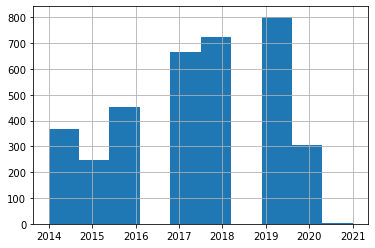

In [30]:
pd.to_datetime(hpd['Project Completion Date']).dt.year.hist()

In [111]:
hpd['Building ID'].value_counts()

967819.0    3
927022.0    2
953668.0    2
299448.0    2
956113.0    2
           ..
65993.0     1
947544.0    1
972119.0    1
972118.0    1
4160.0      1
Name: Building ID, Length: 3948, dtype: int64

In [115]:
hpd[hpd['Building ID'] == 967819.0]

Project ID                Project Name                Program Group  \
893        68076  MANHATTANVILLE (PHASE III)  Multifamily Finance Program   
1410       63168   MANHANTANVILLE (PHASE II)  Multifamily Finance Program   
2952       57758      MANHATTANVILLE PHASE I  Multifamily Finance Program   

     Project Start Date Project Completion Date  Building ID Number    Street  \
893          06/28/2019              06/28/2019     967819.0   3595  BROADWAY   
1410         12/27/2018              12/27/2018     967819.0   3595  BROADWAY   
2952         10/21/2016              10/21/2016     967819.0   3595  BROADWAY   

        Borough  Postcode  ...  2-BR Units  3-BR Units 4-BR Units  5-BR Units  \
893   Manhattan   10031.0  ...          16           0          0           0   
1410  Manhattan   10031.0  ...           7           0          0           0   
2952  Manhattan   10031.0  ...          16           4          0           0   

     6-BR+ Units Unknown-BR Units  Counted Rental Units  \
893            0                0                     1   
1410           0                0                     0   
2952           0                0                     0   

      Counted Homeownership Units  All Counted Units  Total Units  
893                            15                 16           43  
1410                            7                  7           43  
2952                           20                 20           43  

[3 rows x 42 columns]

In [357]:
inyear = hpd[pd.to_datetime(hpd['Project Completion Date']).dt.year == 2018]
notyear = hpd[pd.to_datetime(hpd['Project Completion Date']).dt.year != 2018]

In [358]:
coords = inyear[['Latitude','Longitude']].dropna().values
coords_n2019 = notyear[['Latitude','Longitude']].dropna().values

In [359]:
pointsinyear = geopandas.points_from_xy(coords[:,1], coords[:,0])
pointsinyear.crs = {'init' :'epsg:4326'} 
pointsinyear = pointsinyear.to_crs(epsg=3857)

/Users/sotiriskaragounis/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


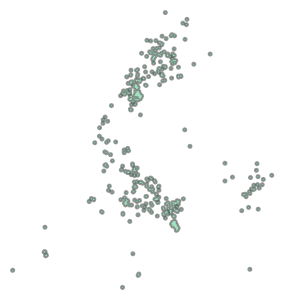

In [365]:
buffersinyear = pointsinyear.buffer(250).unary_union()
buffersinyear

In [361]:
pointsnotyear = geopandas.points_from_xy(coords_n2019[:,1], coords_n2019[:,0])
pointsnotyear.crs = {'init' :'epsg:4326'} 
pointsnotyear = pointsnotyear.to_crs(epsg=3857)

/Users/sotiriskaragounis/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [367]:
buffersnotyear = pointsnotyear.buffer(250).unary_union()

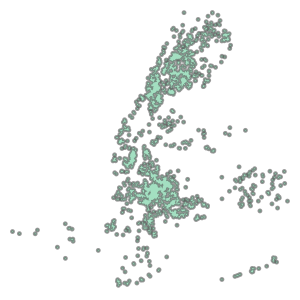

In [368]:
buffersnotyear

In [369]:
geo_df['geometry'].crs = {'init' :'epsg:4326'} 
buffer_check = geo_df['geometry'].to_crs(epsg=3857)

/Users/sotiriskaragounis/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [370]:
inbufferyear = (buffer_check).within(buffersinyear)
inbuffernotyear = (buffer_check).within(buffersnotyear)

In [371]:
inbufferyear.sum() 

54377

In [373]:
(~inbuffernotyear).sum()

773209

In [374]:
df['250m_to_2018_dev'] = inbufferyear
df['no_proximity_newdev'] = ~inbuffernotyear

In [388]:
df.loc[((df['250m_to_2018_dev'] == True) & (df['no_proximity_newdev']  == True)),"no_proximity_newdev"] = False

In [389]:
df.to_csv('adresses_v2.csv',index=False)

In [390]:
in_proximity = dw.merge(df[df['250m_to_2018_dev'] == True], on='BIN')
no_proximity = dw.merge(df[df['no_proximity_newdev'] == True], on='BIN')

In [391]:
n = 1000
in_proximity  = in_proximity.sample(n)
no_proximity = no_proximity.sample(n)

In [392]:
in_proximity['lat'] = in_proximity['geometry'].apply(lambda p:p.x)
in_proximity['lon'] = in_proximity['geometry'].apply(lambda p:p.y)
no_proximity['lat'] = no_proximity['geometry'].apply(lambda p:p.x)
no_proximity['lon'] = no_proximity['geometry'].apply(lambda p:p.y)

In [393]:
NYC_COORD = [40.7128, -74.0059]
map_nyc = folium.Map(location=NYC_COORD, zoom_start=12, 
tiles='cartodbpositron', width=640, height=480)

In [394]:
[folium.CircleMarker(coord, radius=1, color='#ffa500', fill_color='#ffa500').add_to(map_nyc) for coord in zip(in_proximity['lon'].values,in_proximity['lat'].values)]
[folium.CircleMarker(coord, radius=1, color='#ff3333', fill_color='#ff3333').add_to(map_nyc) for coord in zip(no_proximity['lon'].values,no_proximity['lat'].values)]
[folium.CircleMarker(tuple(coords[i,:]), radius=1, color='#0080bb', fill_color='#0080bb').add_to(map_nyc) for i in range(len(coords))]
map_nyc

In [397]:
test_set = in_proximity.append(no_proximity)

In [399]:
test_set.shape

(2000, 43)

In [400]:
test_set.to_csv('test_set.csv',index=False)

In [402]:
test_set.columns

Index(['RegistrationID', 'BuildingID', 'BoroID', 'Boro', 'HouseNumber',
       'LowHouseNumber', 'HighHouseNumber', 'StreetName', 'StreetCode', 'Zip',
       'Block', 'Lot', 'BIN', 'CommunityBoard', 'LastRegistrationDate',
       'RegistrationEndDate', 'ADDRESS_ID', 'H_NO', 'the_geom', 'HNO_SUFFIX',
       'HYPHEN_TYP', 'SIDE_OF_ST', 'SPECIAL_CO', 'BOROCODE', 'ZIPCODE',
       'CREATED', 'MODIFIED', 'ST_NAME', 'HN_RNG_SUF', 'HN_RNG', 'PHYSICALID',
       'PRE_MODIFI', 'PRE_DIRECT', 'PRE_TYPE', 'POST_TYPE', 'POST_DIREC',
       'POST_MODIF', 'FULL_STREE', 'geometry', '250m_to_2018_dev',
       'no_proximity_newdev', 'lat', 'lon'],
      dtype='object')

In [426]:
test_set['HouseNumber'] + ' ' + test_set['StreetName'] + ' ' + test_set['Boro'] #+ ' ' + test_set['Zip'].to_string()

23754       1743 DAVIDSON AVENUE BRONX
2485       2578 PITKIN AVENUE BROOKLYN
3359      909 BUSHWICK AVENUE BROOKLYN
17834      76 ORCHARD STREET MANHATTAN
19351        99 MONROE STREET BROOKLYN
                      ...             
105870     143 EAST 42 STREET BROOKLYN
108715       2932 BAISLEY AVENUE BRONX
56181           832 6 AVENUE MANHATTAN
29059          111-45 76 AVENUE QUEENS
51673      2017 PALMETTO STREET QUEENS
Length: 2000, dtype: object